In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
df=pd.read_csv('Churn_Modelling.csv')

In [170]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [171]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [172]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [174]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


credit score column

In [175]:

df['CreditScore']
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

Age column

In [176]:
df['Age']
df['Age'].value_counts()
# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+']

# Create a new column 'AgeGroup' in your DataFrame
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [177]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-49
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-49
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-39
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-49


In [178]:
exit_counts = df[df['Exited'] == 1]['AgeGroup'].value_counts().reindex(age_labels, fill_value=0)
exit_counts

AgeGroup
0-19       5
20-29    143
30-39    538
40-49    788
50-59    448
60+      115
Name: count, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_14876\2604947182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exit_counts.index, y=exit_counts.values, palette='Set2')


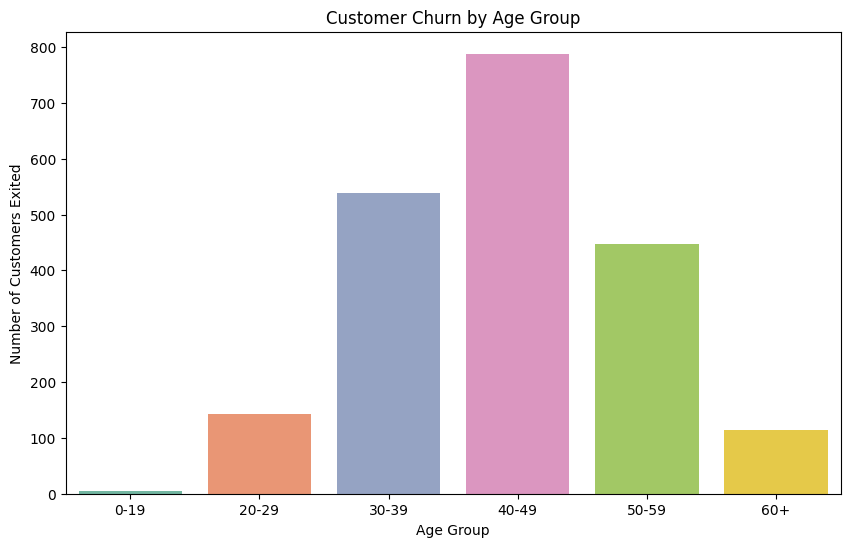

In [179]:
plt.figure(figsize=(10, 6))
sns.barplot(x=exit_counts.index, y=exit_counts.values, palette='Set2')
plt.title('Customer Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers Exited')
plt.show()


In [180]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-49
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-49
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-39
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-49


geography

In [181]:
df['Geography']
df['Geography'].unique()
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Geography'>

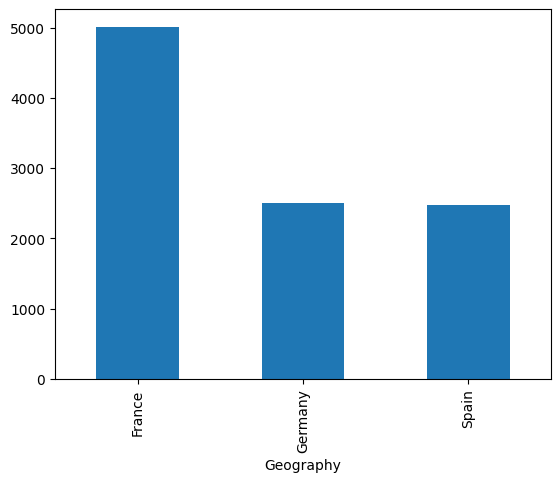

In [182]:
df['Geography'].value_counts().plot(kind='bar')

In [183]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-49
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-49
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-39
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-49


gender

In [184]:
df['Gender']
df['Gender'].unique()
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: xlabel='Gender'>

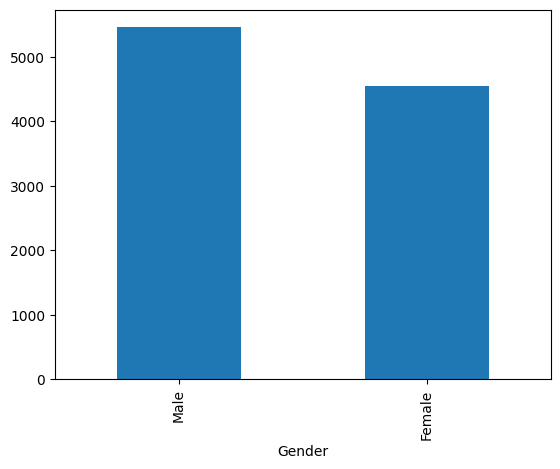

In [185]:
df['Gender'].value_counts().plot(kind='bar')

In [186]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-49
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-49
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-39
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-49


In [187]:
df.drop(columns=['AgeGroup'],inplace=True)

In [188]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [190]:
df=pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [191]:
df.shape

(10000, 12)

encoding categorical value

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Exited']),df['Exited'],test_size=.2,random_state=42)

In [193]:
x_train.shape

(8000, 11)

In [194]:
x_test.shape

(2000, 11)

In [195]:
y_train.shape

(8000,)

In [196]:
y_test.shape

(2000,)

In [197]:
x_train.shape

(8000, 11)

Scaling

In [198]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [199]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# ANN model training

In [200]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [212]:
# making squential model object
model=Sequential()

# adding hidden layer-1
model.add(Dense(10,activation='relu',input_dim=11))
# adding hidden layer-2
model.add(Dense(10,activation='relu'))
# adding output layer
model.add(Dense(1,activation='sigmoid'))

In [213]:
# model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                120       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


model compilation

In [214]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

fitting model and saves its history

In [215]:
history=model.fit(x_train,y_train,batch_size=50,epochs=100,validation_split=.2,verbose=1)

Epoch 1/100


128/128 [==============================] - 2s 5ms/step - loss: 0.7878 - accuracy: 0.4313 - val_loss: 0.5924 - val_accuracy: 0.7806
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7959 - val_loss: 0.4752 - val_accuracy: 0.7981
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.7962 - val_loss: 0.4497 - val_accuracy: 0.8006
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4466 - accuracy: 0.7998 - val_loss: 0.4357 - val_accuracy: 0.8094
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8058 - val_loss: 0.4247 - val_accuracy: 0.8175
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.8158 - val_loss: 0.4134 - val_accuracy: 0.8269
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8278 - val_loss: 0.4009 - val_accuracy: 0.8369
Epoch 8/100

In [216]:
y_pred=model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [217]:
y_pred

array([[0.05920346],
       [0.02398469],
       [0.10988747],
       ...,
       [0.68038446],
       [0.08915543],
       [0.22668862]], dtype=float32)

In [218]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [219]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035

graph between training and validation loss

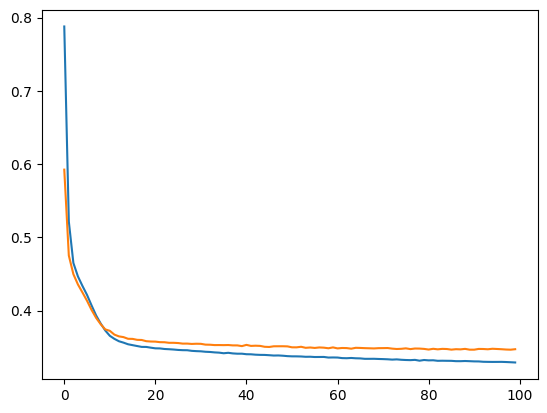

In [220]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

graph between training and validation accuracy

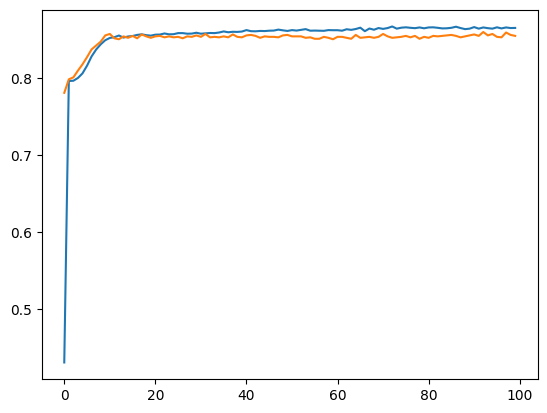

In [221]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])